# GRIP TASK 2
Prediction Using Unsupervised Machine Learning

Author: Venkatesh Hegde 

### K- Means Clustering and GMM Clustering

This notebook will walk through some of the basics of K-Means Clustering and GMM Clustering.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
s_data = pd.read_csv('Iris.csv')
print("Data imported successfully")
s_data.head(10)

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# converting species into an array of integer to represent using colormap
a = s_data.Species
b = pd.get_dummies(a)
species = b.values.argmax(1)
species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

# Classification

Text(0, 0.5, 'Petal Width')

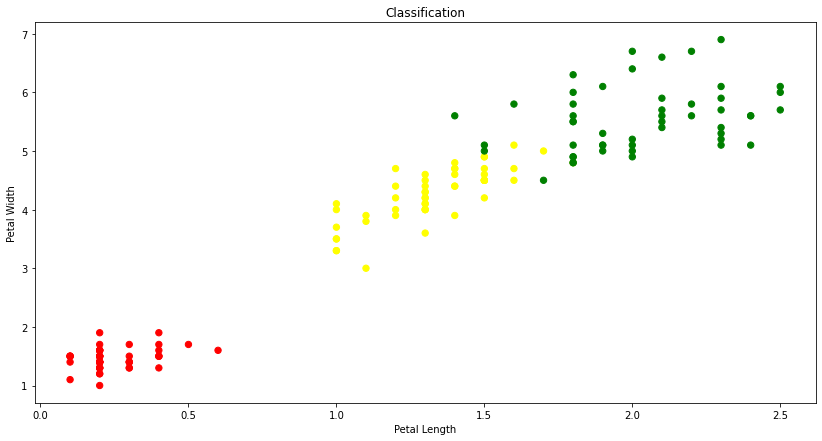

In [18]:
# classification
colormap = np.array(['red','yellow','green'])
plt.figure(figsize=(14,7))
plt.subplot(1, 1, 1)
plt.scatter(s_data.PetalWidthCm, s_data.PetalLengthCm,c =colormap[species] ,s=40)
plt.title('Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Kmeans classification

The accuracy score of K-Mean:  0.8933333333333333
The Confusion matrixof K-Mean:  [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


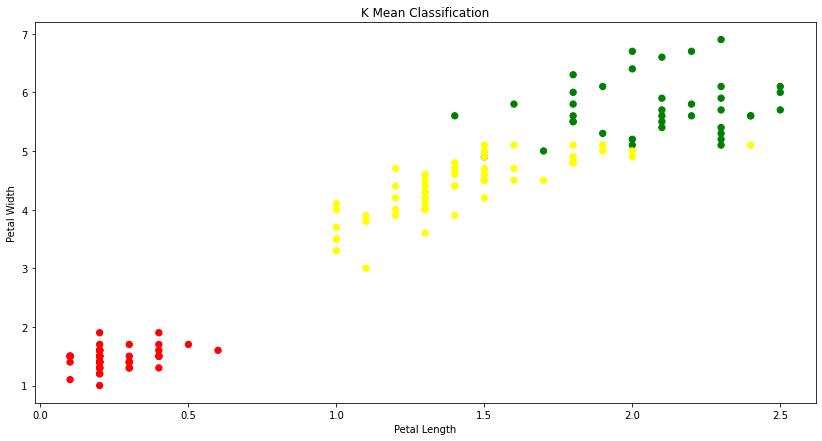

In [27]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm
X = s_data.iloc[:, 1:-1].values
model = KMeans(n_clusters=3)
model.fit(X)
plt.figure(figsize=(14,7))
plt.scatter(s_data.PetalWidthCm, s_data.PetalLengthCm, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(species, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(species, model.labels_))

### Kmeans clustering is showing 89 percent of accuracy.

# Classification using Gaussian Mixture

The accuracy score of EM:  0.9666666666666667
The Confusion matrix of EM:  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


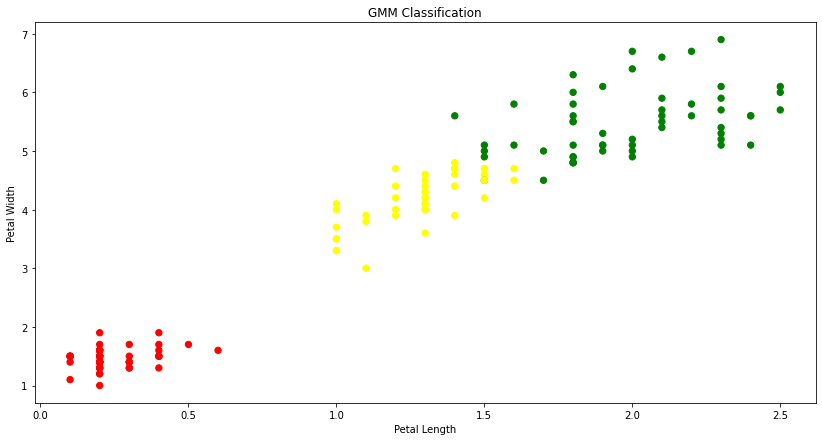

In [31]:
from sklearn.mixture import GaussianMixture
X = s_data.iloc[:, 1:-1].values
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)
plt.figure(figsize=(14,7))
plt.subplot(1, 1, 1)
plt.scatter(s_data.PetalWidthCm, s_data.PetalLengthCm, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(species, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(species, y_gmm))

## GMM is showing 96 percent accuracy

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

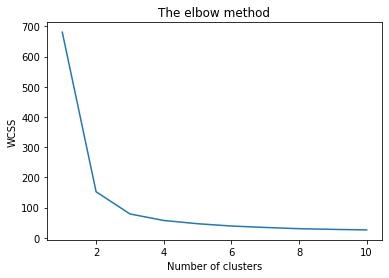

In [33]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

In [34]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

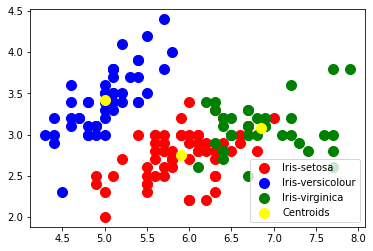

In [35]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [38]:
 #Applying gmm to the dataset / Creating the gmm classifier
gmm = GaussianMixture(n_components = 3,
                max_iter = 300, n_init = 10, random_state = 0)
y_gmm = gmm.fit_predict(X)


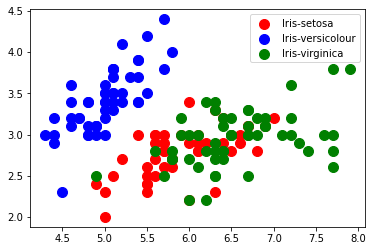

In [43]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_gmm == 0, 0], X[y_gmm == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_gmm == 1, 0], X[y_gmm == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_gmm == 2, 0], X[y_gmm == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.legend()

# Thank you